In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['customerID'].nunique()

7043

let us drop this column of all unique values

In [10]:
df.drop(columns=['customerID'],inplace=True)

# EDA

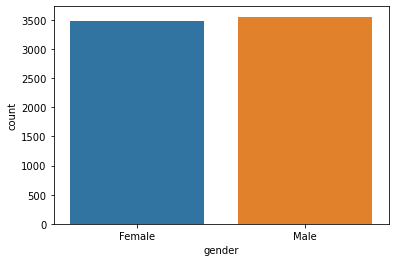

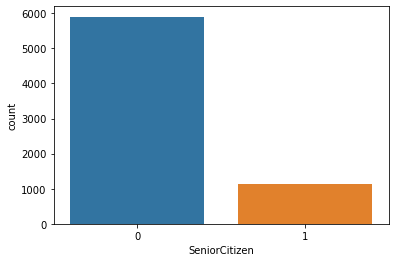

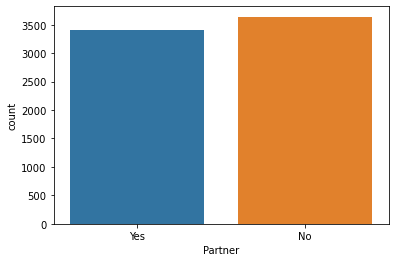

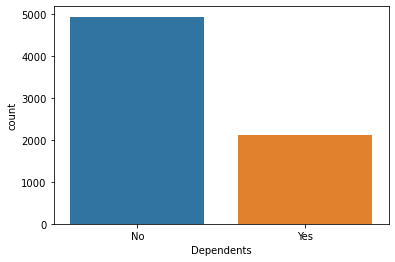

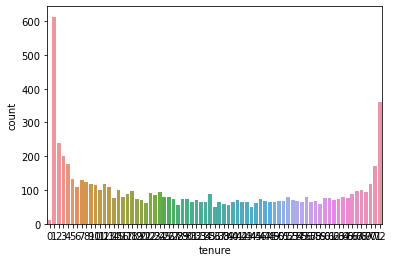

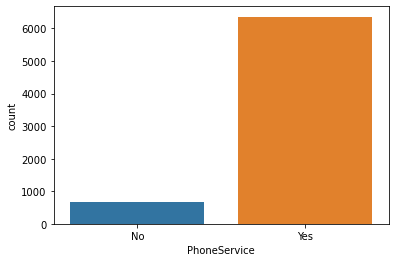

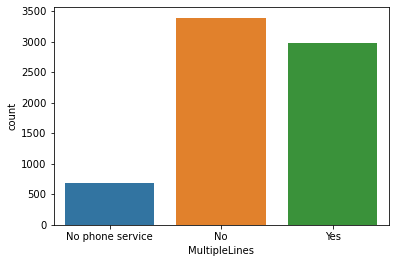

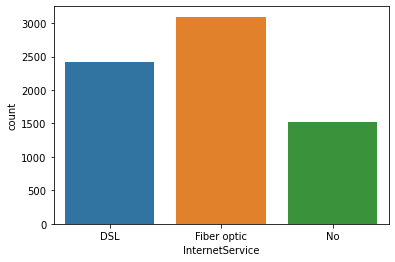

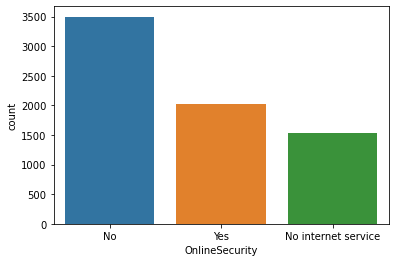

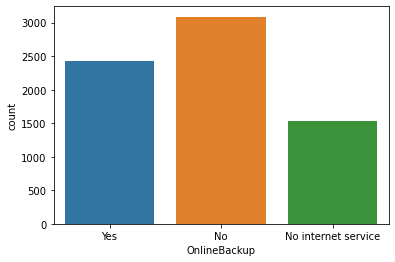

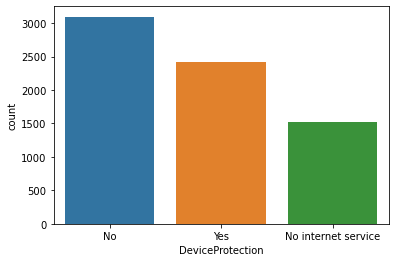

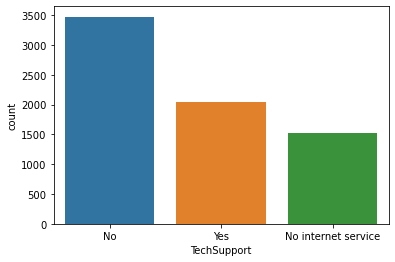

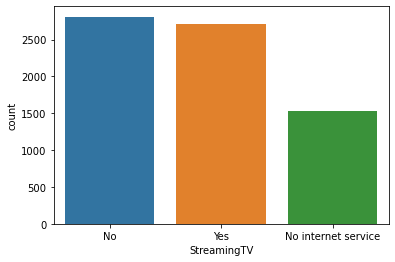

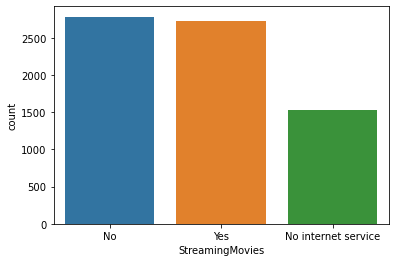

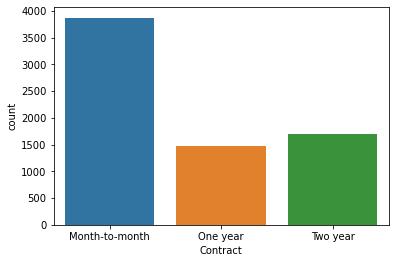

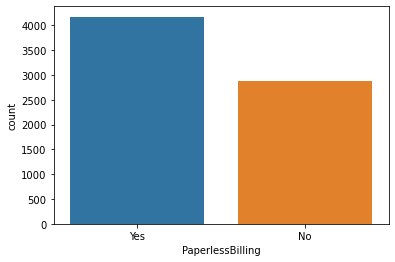

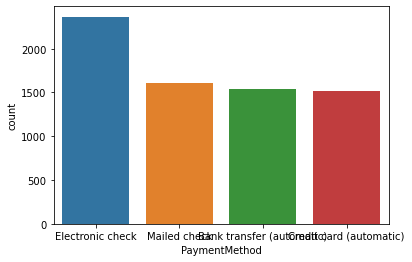

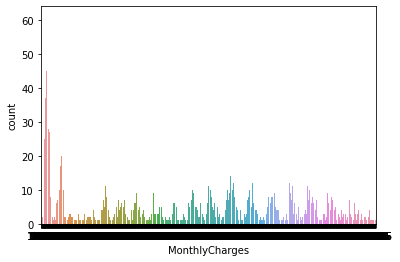

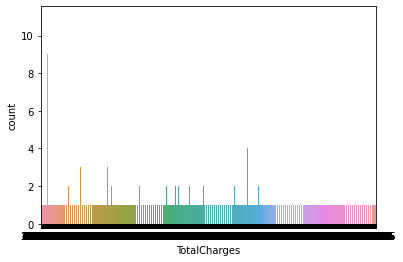

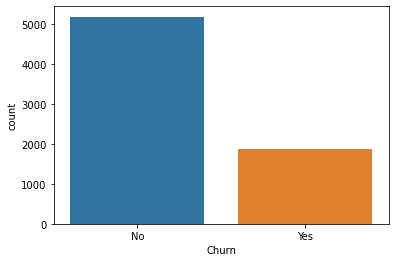

In [11]:
columns=df.columns

for i in columns:
    sns.countplot(df[i])
    plt.show()

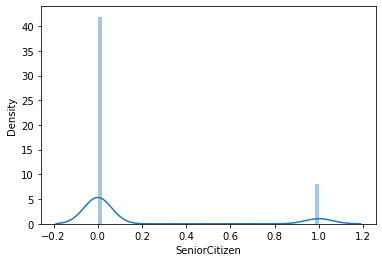

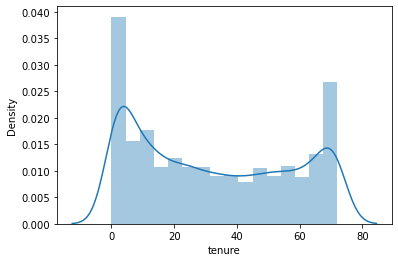

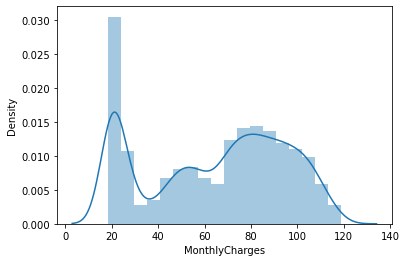

In [12]:
cols=['SeniorCitizen','tenure','MonthlyCharges']

for i in cols:
    sns.distplot(df[i])
    plt.show()

In [13]:
columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

Let us first transform the object type data to numerical using Label encoding

In [14]:
Object=['gender', 'Partner', 'Dependents', 
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
        'TotalCharges', 'Churn']

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in Object:
    df[i]=le.fit_transform(df[i])

In [15]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,0,2,0,2,2,2,2,1,1,3,84.80,1597,0
7039,0,0,1,1,72,1,2,1,0,2,2,0,2,2,1,1,1,103.20,5698,0
7040,0,0,1,1,11,0,1,0,2,0,0,0,0,0,0,1,2,29.60,2994,0
7041,1,1,1,0,4,1,2,1,0,0,0,0,0,0,0,1,3,74.40,2660,1


In [16]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.630959
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

In [17]:
col_skewd = ['SeniorCitizen','Dependents','PhoneService','Contract']
from sklearn.preprocessing import power_transform

for i in col_skewd:
    

    df[i]=power_transform(df[i].to_numpy().reshape(-1, 1))


In [18]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

skewness can not be removed by power transformation

Check for outliers

In [19]:
from numpy import mean
from numpy import std



for i in columns:
    if isinstance(df[i][0], str) :
        continue
    else:
        #Calculating Mean and Std 
        mean, std = (df[i].mean(),df[i].std())
        # identify outliers
        cut_off = std*3.0
        lower, upper = mean - cut_off, mean + cut_off
        outliers = [x for x in df[i] if x < lower or x > upper]
        print('Identified outliers: %d' % len(outliers))
        df[i] = df[i].apply(lambda x: lower if x < lower else (upper if x > upper else x))



Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 682
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0
Identified outliers: 0


In [20]:
df.skew()

gender             -0.019031
SeniorCitizen       1.833633
Partner             0.067922
Dependents          0.875199
tenure              0.239540
PhoneService       -2.727153
MultipleLines       0.118719
InternetService     0.205423
OnlineSecurity      0.416985
OnlineBackup        0.182930
DeviceProtection    0.186847
TechSupport         0.402365
StreamingTV         0.028486
StreamingMovies     0.014657
Contract            0.302174
PaperlessBilling   -0.375396
PaymentMethod      -0.170129
MonthlyCharges     -0.220524
TotalCharges        0.015857
Churn               1.063031
dtype: float64

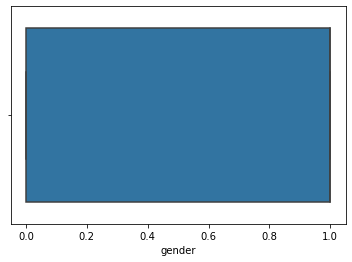

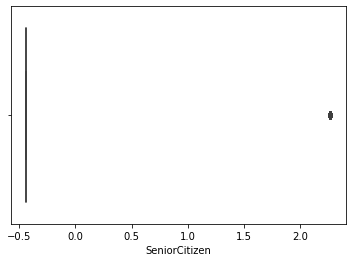

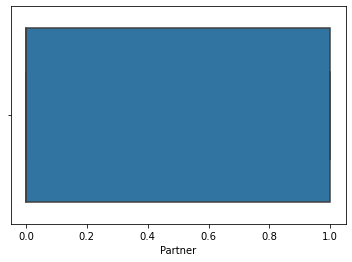

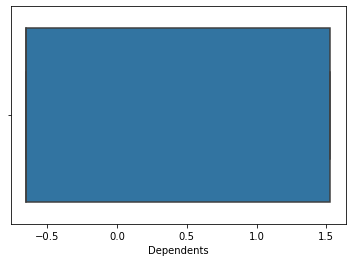

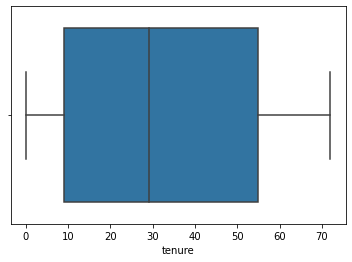

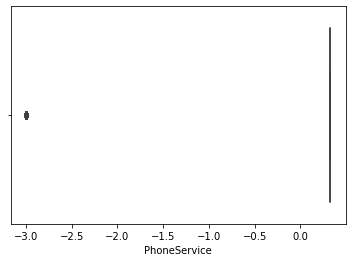

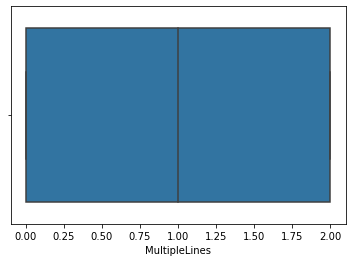

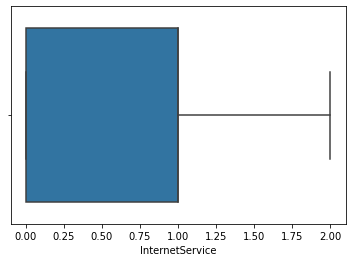

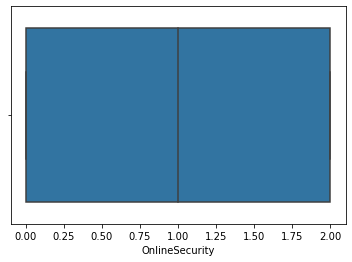

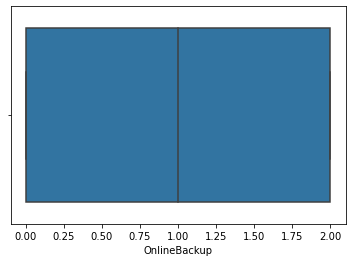

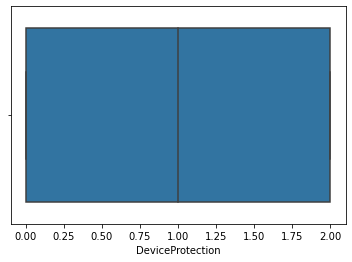

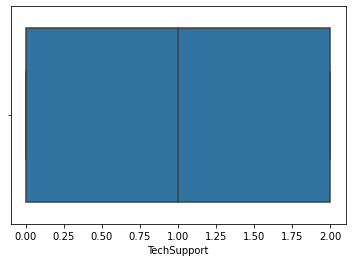

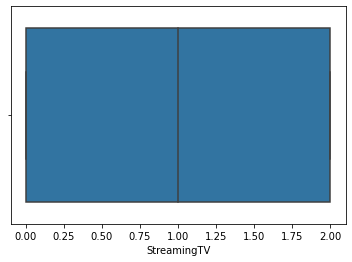

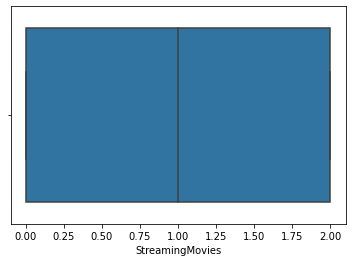

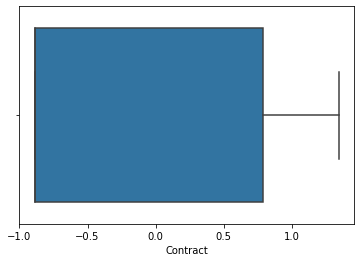

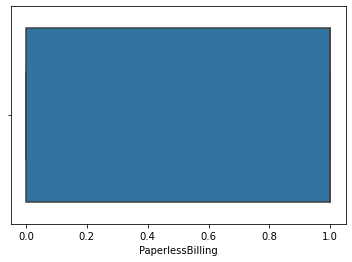

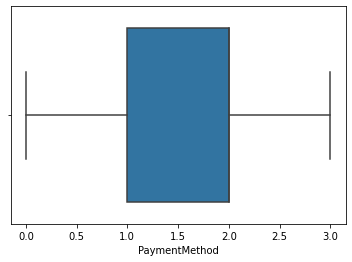

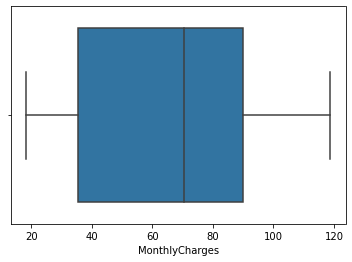

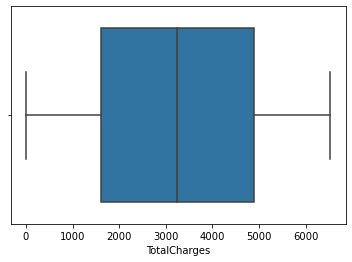

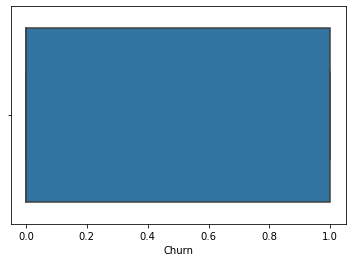

In [21]:
for i in columns:
    sns.boxplot(df[i])
    plt.show()

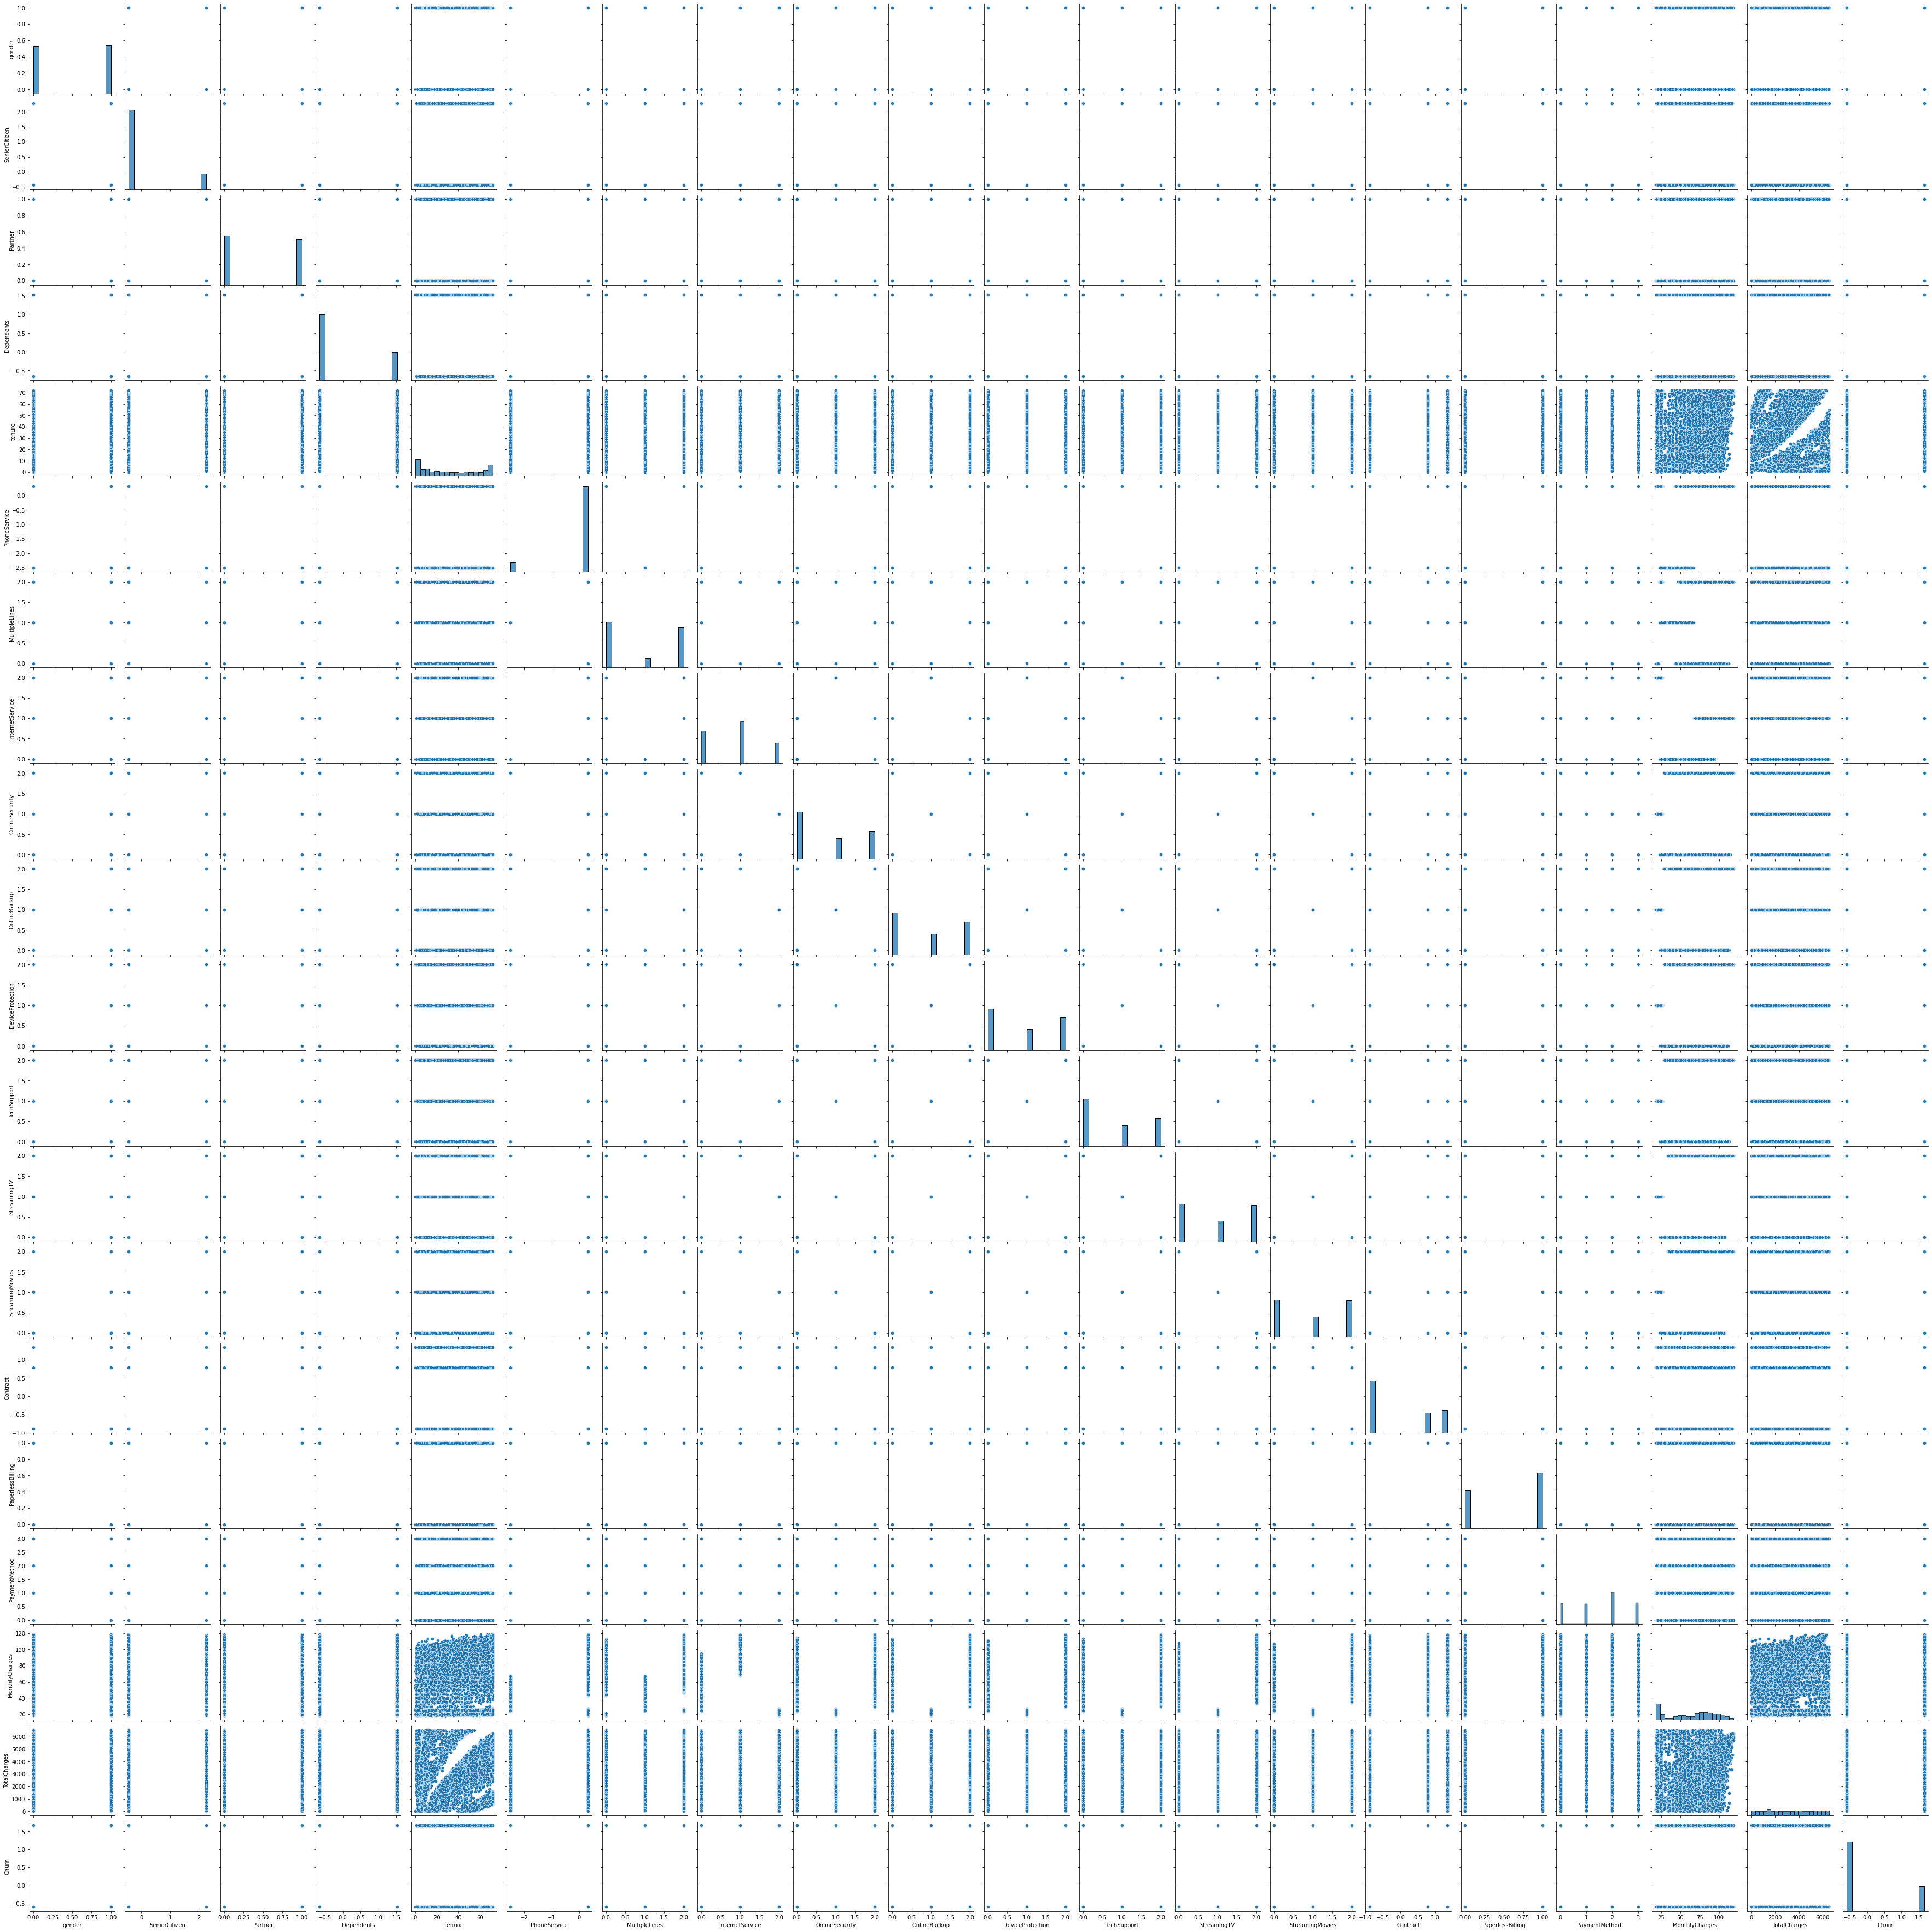

In [23]:
sns.pairplot(df)

Nothing can be concluded from this plot, let us check for correlation using heatmap

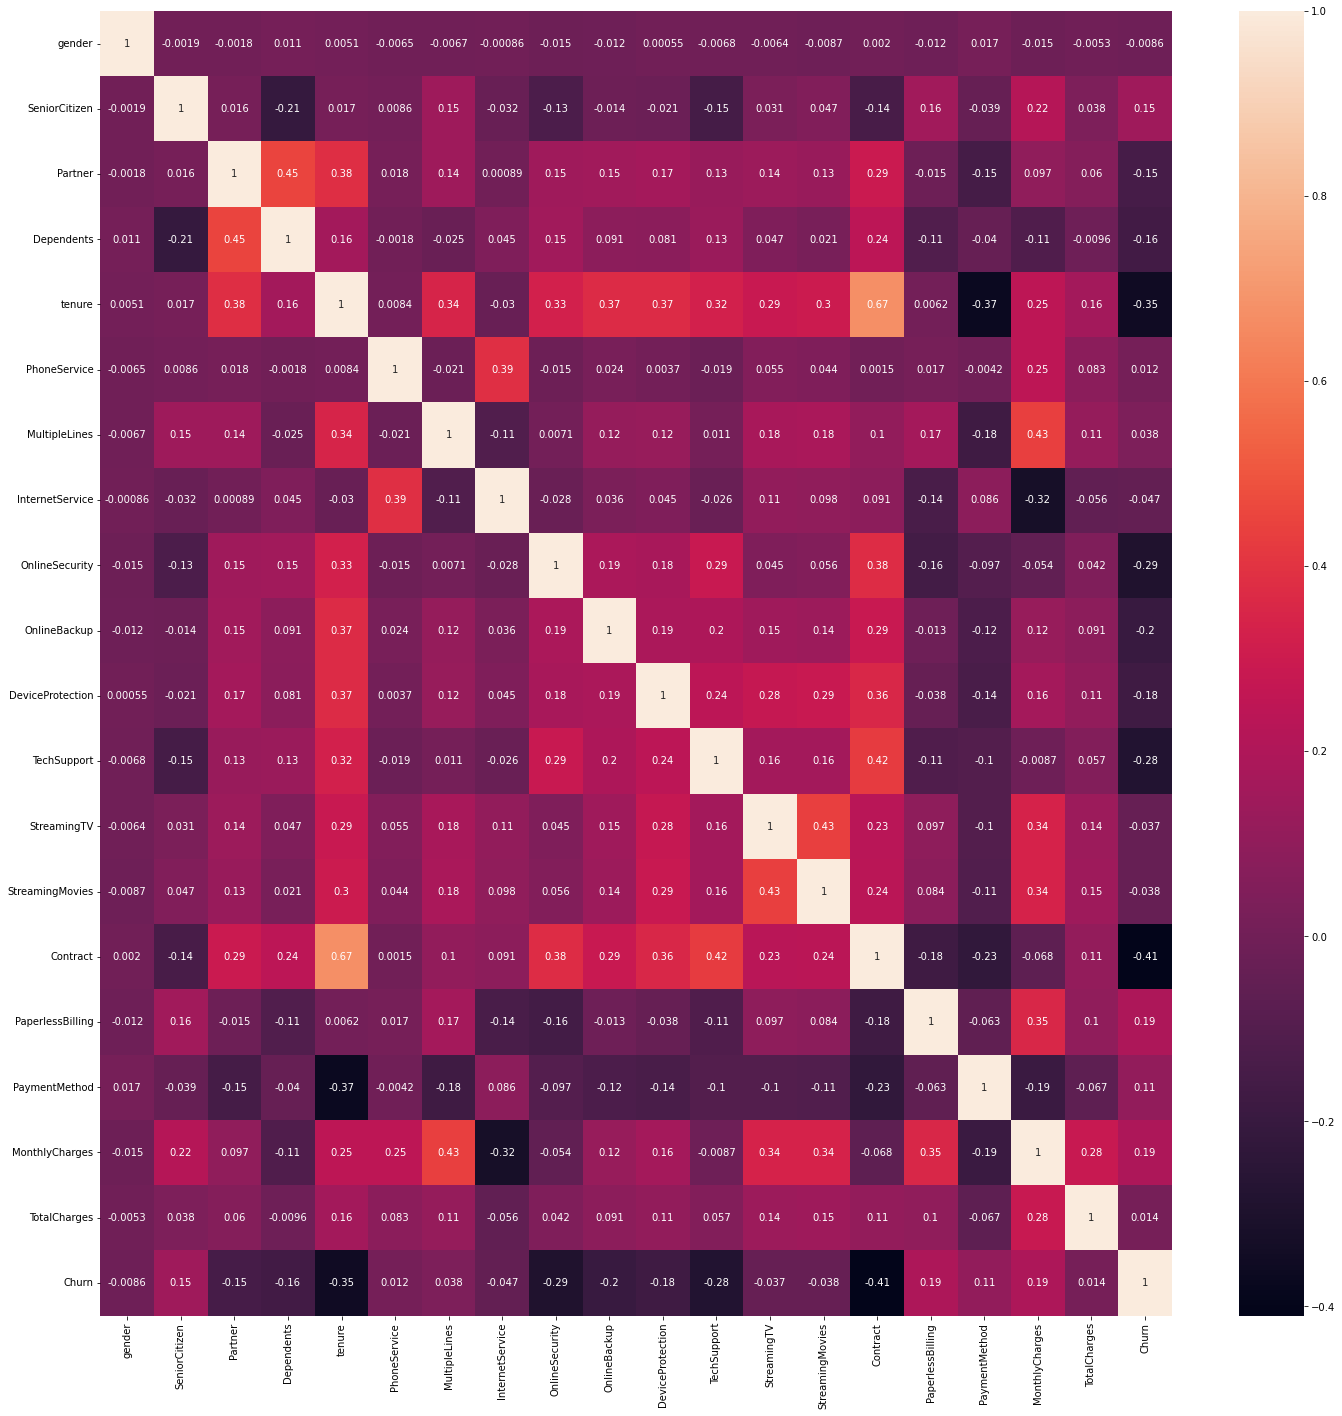

In [22]:
corr_hmap=df.corr()

plt.figure(figsize=(24,24))
sns.heatmap(corr_hmap,annot=True)
plt.show()

Contract and tenure seems to have high correlation

In [23]:
# Let us find out which feature has high correlation(>0.7)

for a in range(len(df.corr().columns)):
    for b in range(a):
        if abs(df.corr().iloc[a,b]) >0.65:
            name = df.corr().columns[a]
            print(name)

Contract


Let us now standardize the data using standardscalar transformation & then Check Multi colinearity using VIF

In [24]:
from sklearn.preprocessing import StandardScaler
x = df.drop(columns=["Churn"])
y=df["Churn"]

scaler=StandardScaler()
x_scaled= scaler.fit_transform(x)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["features"]=x.columns
vif

,vif,features
0,1.001658,gender
1,1.149927,SeniorCitizen
2,1.460799,Partner
3,1.382016,Dependents
4,2.747272,tenure
5,1.622576,PhoneService
6,1.392885,MultipleLines
7,1.827656,InternetService
8,1.248807,OnlineSecurity
9,1.186756,OnlineBackup


In [26]:
y.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

No feature needs to be removed 

# Model Fitting and Selection
We will check the best possible random state to train our model. Using LogisticRegression to check and then later will run with other models

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [28]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.30,random_state=i)
    mod=LogisticRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best Accuracy is',maxAccu,' on Random state',maxRS)

Best Accuracy is 0.8230004732607666  on Random state 24


let us now split the data with the best random state is 24

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=.20,random_state=24)

In [31]:
lg=LogisticRegression()
sv=SVC(probability=True)
knn=KNeighborsClassifier(n_neighbors=5)
rfc=RandomForestClassifier(n_estimators=100)
dt=DecisionTreeClassifier()
gnb=GaussianNB()
ad=AdaBoostClassifier(n_estimators=100)

In [32]:
model=(lg,sv,knn,rfc,dt,gnb,ad)
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy score of',m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    print('-------------------------------------------------------------------------------------------')

Accuracy score of LogisticRegression()
0.8211497515968772
[[962  95]
 [157 195]]
              precision    recall  f1-score   support

           0       0.86      0.91      0.88      1057
           1       0.67      0.55      0.61       352

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.82      1409

-------------------------------------------------------------------------------------------
Accuracy score of SVC(probability=True)
0.8161816891412349
[[977  80]
 [179 173]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1057
           1       0.68      0.49      0.57       352

    accuracy                           0.82      1409
   macro avg       0.76      0.71      0.73      1409
weighted avg       0.80      0.82      0.81      1409

-------------------------------------------------------------------------------------------

Logistic Regression followed by AdaBoost is giving the best test accuracy

# Cross Validation
llet us check the underfitting and overfitting of the best model using cross validation technique

In [34]:
# from sklearn.model_selection import cross_val_score

for m in model:
    score=cross_val_score(m,x_scaled,y,cv=5)
    print('Mean Accuracy of', m)
    print(score.mean())
    print('-------------------------------------------------------------------------------')

Mean Accuracy of LogisticRegression()
0.8034945802955029
-------------------------------------------------------------------------------
Mean Accuracy of SVC(probability=True)
0.797957327892122
-------------------------------------------------------------------------------
Mean Accuracy of KNeighborsClassifier()
0.7550755290663914
-------------------------------------------------------------------------------
Mean Accuracy of RandomForestClassifier()
0.7917096465901027
-------------------------------------------------------------------------------
Mean Accuracy of DecisionTreeClassifier()
0.7276727530808439
-------------------------------------------------------------------------------
Mean Accuracy of GaussianNB()
0.7600457085941029
-------------------------------------------------------------------------------
Mean Accuracy of AdaBoostClassifier(n_estimators=100)
0.8029249870959416
-------------------------------------------------------------------------------


RFC is giving the least difference between test accuracy and cv score



# ROC_AUC score

AUC Score of LogisticRegression()
0.7320501311602305




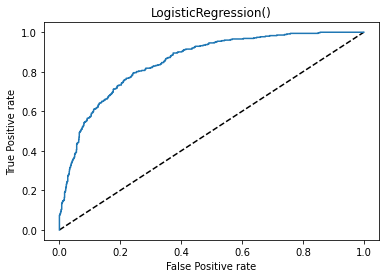



------------------------------------------------------------------------
AUC Score of SVC(probability=True)
0.7078956846133998




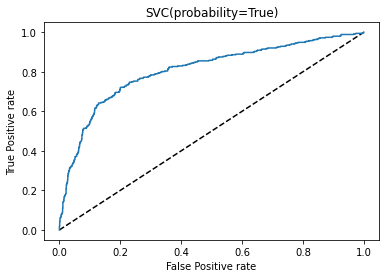



------------------------------------------------------------------------
AUC Score of KNeighborsClassifier()
0.6771563494452566




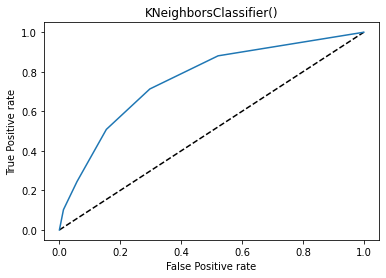



------------------------------------------------------------------------
AUC Score of RandomForestClassifier()
0.7045871140448955




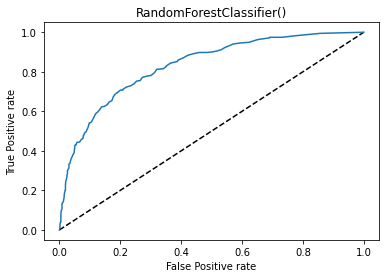



------------------------------------------------------------------------
AUC Score of DecisionTreeClassifier()
0.6686416853014535




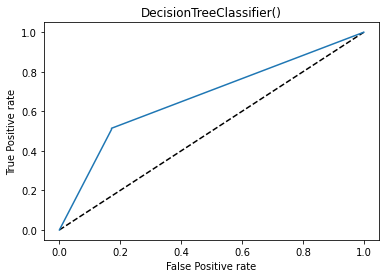



------------------------------------------------------------------------
AUC Score of GaussianNB()
0.7562569880450676




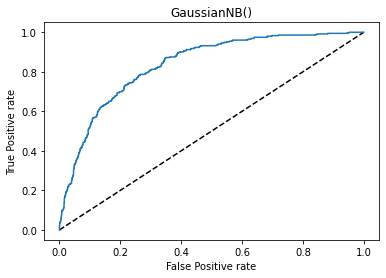



------------------------------------------------------------------------
AUC Score of AdaBoostClassifier(n_estimators=100)
0.7263669691235917




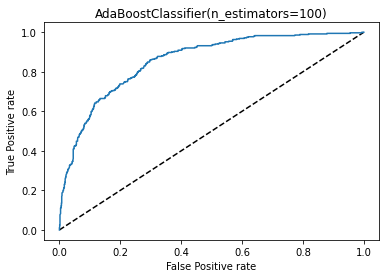



------------------------------------------------------------------------


In [35]:
from sklearn.metrics import roc_curve,roc_auc_score

for m in model:
    y_pred_prob=m.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    auc_score=roc_auc_score(y_test,m.predict(x_test))
    print('AUC Score of', m)
    print(auc_score)
    print('\n')
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr,label=m)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(m)
    plt.show()
    print('\n')
    print('------------------------------------------------------------------------')

GaussianNB is giving the best ROC curve, so it can be choosen as the best model

# HyperTuning

In [41]:
from sklearn.model_selection import GridSearchCV
params = {'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}
gnb=GaussianNB()

grid_search = GridSearchCV(gnb,params, cv=5, n_jobs=-1) 


grid_search.fit(x_train, y_train)
print("Optimal hyperparameter combination:", grid_search.best_params_)

Optimal hyperparameter combination: {'var_smoothing': 0.0001}


In [43]:
Finalmod=GaussianNB(var_smoothing=0.0001)
Finalmod.fit(x_train,y_train)
pred=Finalmod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

77.07594038325053


In [45]:
import joblib
joblib.dump(Finalmod,'Customer Churn')

['Customer Churn']